Beata Sirowy

# Bayes therorem in practice

Based on: Downey, A. (2021) _Think Bayes_

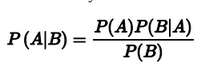

### The cookie problem (example)

Suppose there are two bowls of cookies.

- Bowl 1 contains 30 vanilla cookies and 10 chocolate cookies.
- Bowl 2 contains 20 vanilla cookies and 20 chocolate cookies.

Now suppose you choose one of the bowls at random and, without looking,
choose a cookie at random. If the cookie is vanilla, what is the probability that
it came from Bowl 1?

P (Bowl 1, given = vanilla) = P(Bowl1)P(vanilla, given Bowl1) / P(vanilla)

P(B1\V) = P(B1)P(V\B1) \ P(V)

P(B1) = 0.5
P (V\B1) = 0.75
p(V) = 5/8

P (B1\V) = 0.5 * 0,75 / (5/8)

In [14]:
result = 0.5 * 0.75 / (5/8)
print(f"Given that the cookie is vanilla, the probability that it came from Bowl 1 is: {result}")

Given that the cookie is vanilla, the probability that it came from Bowl 1 is: 0.6


### A coin toss (example)

- coin 1: equal chances of getting H and T
- coin 2: 90% chance of getting H

We randomly choose a coin. Given that we got heads, what is the chance that it was coin 2?

We have to compute P (C2 given H)


P (C2 \ H) = P(C2) * P(H\C2) / P(H)

P(C2) = 0.5
P (H\C2) = 0.9
p (H) = 14/20 = 0.7

P P (C2\H) = 0.5 * 0.9 / 0.7


In [17]:
result1 = 0.5 * 0.9 / 0.7
print(f"Given that the result is heads, the probability that we picked Coin 2 is: {result1}")

Given that the result is heads, the probability that we picked Coin 2 is: 0.6428571428571429


### Medical screening (example)

Suppose a physician reported the following cancer
screening test scenario among 10,000 people:

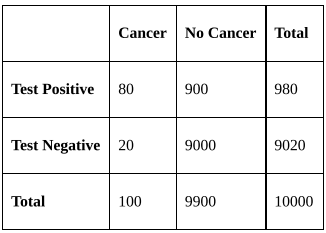

If the result of this screening test on a person is positive, what is the
probability that they actually have cancer?

We have to compute P (C, P)


P(C\ P) = P(C) * P (P\ C) / P (P)

P(C) = 0.01
P(P) = 0.098
P (P\c) = 0.8

p(C\P) = 0.01 * 0.8 / 0.098 

In [19]:
result2 = 0.01 * 0.8 / 0.098 
print(f"Given that the screening result is positive, the probability that the person has cancer is: {result2}")

Given that the screening result is positive, the probability that the person has cancer is: 0.08163265306122448


Given a positive screening result, the chance that the subject has cancer is
8.16%, which is significantly higher than the one under general assumption
(100/10000=1%) without the subject undergoing the screening.

### Factory machines (example)

Three machines A, B, and C in a factory account for 35%,
20%, and 45% of bulb production. The fraction of defective bulbs
produced by each machine is 1.5%, 1%, and 2%, respectively. A bulb
produced by this factory was identified as defective, which is denoted
as event D. What are the probabilities that this bulb was manufactured
by machine A, B, and C, respectively?

P(A\D) = P(A) * P(D\A) / P(D)

P(B\D) = P(B) * P(D\B) / P(D)

P(C\D) = P(C) * P(C\A) / P(D)


P(A) = 0.35,  P(D\A) = 0,0015

P(B) = 0.20,  P(D\B) = 0.001

P(C) = 0.45, P(D\c) = 0.002

P (D) = P(DA) + P(DB) + P(DC) = 0.35 * 0.0015 + 0.2 * 0.001 + 0.45 * 0.002

In [29]:
Pd = (0.35 * 0.0015) + (0.2 * 0.001) + (0.45 * 0.002)

resultA = 0.35 * 0.0015 / Pd

resultB = 0.2 * 0.001 / Pd

resultC = 0.45 * 0.002 / Pd


print("The chance that the defective bulb comes from machine A is: ", resultA)
print("The chance that the defective bulb comes from machine B is: ", resultB)
print("The chance that the defective bulb comes from machine C is: ", resultC)


sum = resultA + resultB + resultC

print("The total probability of events: ", sum)


The chance that the defective bulb comes from machine A is:  0.32307692307692304
The chance that the defective bulb comes from machine B is:  0.12307692307692307
The chance that the defective bulb comes from machine C is:  0.5538461538461539
The total probability of events:  1.0


### Diachronic Bayes
There is another way to think of Bayes’s theorem: it gives us a way to update the
probability of a hypothesis H , given some body of data, D .
- This interpretation is “diachronic”, which means “related to change over time”;
in this case, the probability of the hypotheses changes as we see new data.
- Rewriting Bayes’s theorem with H and D yields:

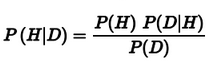

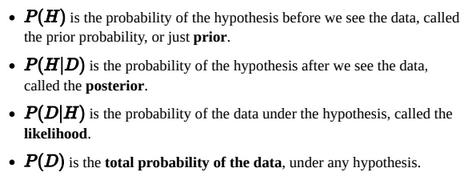

- Sometimes we can compute the prior based on background information. For
example, the Cookie Problem specifies that we choose a bowl at random with
equal probability.
- In other cases the prior is subjective; that is, reasonable people might disagree,
either because they use different background information or because they
interpret the same information differently.
- The likelihood is usually the easiest part to compute. In the Cookie Problem, we
are given the number of cookies in each bowl, so we can compute the probability of the data under each hypothesis.
- Computing the total probability of the data can be tricky. It is supposed to be the
probability of seeing the data under any hypothesis at all, but it can be hard to
nail down what that means.
- Most often we simplify things by specifying a set of hypotheses that are:
Mutually exclusive, which means that only one of them can be true, and
Collectively exhaustive, which means one of them must be true.
- When these conditions apply, we can compute using the law of total
probability.

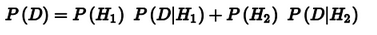

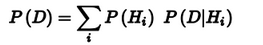

The process of using data and a prior probability to compute a
posterior probability, is called __a Bayesian update__.

### Bayes tables: cookie example

A convenient tool for doing a Bayesian update is a Bayes table. You can write a
Bayes table on paper or use a spreadsheet, but in this section I’ll use a pandas
DataFrame.

In [31]:
import pandas as pd
table = pd.DataFrame(index=['Bowl 1', 'Bowl 2'])

table

""
Bowl 1
Bowl 2


In [53]:
table['prior'] = 1/2, 1/2
table['likelihood_Vanilla'] = 3/4, 1/2
table

,prior,likelihood_Vanilla
Bowl 1,0.5,0.75
Bowl 2,0.5,0.50


Here we see a difference from the previous method: we compute likelihoods for
both hypotheses, not just Bowl 1:

- The chance of getting a vanilla cookie from Bowl 1 is 3/4.
- The chance of getting a vanilla cookie from Bowl 2 is 1/2.

The next step is similar to what we did with Bayes’s theorem; we multiply the
priors by the likelihoods:



which is the numerator of Bayes’s theorem. If we add them up, we have



which is the denominator of Bayes’s theorem P(D)

In [55]:
table['unnorm_posteriors'] = table['prior'] * table['likelihood_Vanilla']
table

,prior,likelihood_Vanilla,unnorm_posteriors
Bowl 1,0.5,0.75,0.375
Bowl 2,0.5,0.50,0.250


So we can compute the total probability of the data P(D) like this:

In [56]:
prob_data = table['unnorm_posteriors'].sum()
prob_data

np.float64(0.625)

And we can compute the posterior probabilities P(H\D) like this:

In [58]:
table['posterior'] = table['unnorm_posteriors'] / prob_data
table

,prior,likelihood_Vanilla,unnorm_posteriors,posterior
Bowl 1,0.5,0.75,0.375,0.6
Bowl 2,0.5,0.50,0.250,0.4


- The posterior probability for Bowl 1 is 0.6, which is what we got using Bayes’s
theorem explicitly. As a bonus, we also get the posterior probability of Bowl 2,
which is 0.4.

- When we add up the unnormalized posteriors and divide through, we force the
posteriors to add up to 1. This process is called __“normalization”__, which is why
the total probability of the data is also called the __“normalizing constant”__.

### The dice problem (example)

A Bayes table can also solve problems with more than two hypotheses.

_Suppose I have a box with a 6-sided die, an 8-sided die, and a 12-sided die. I
choose one of the dice at random, roll it, and report that the outcome is a 1.
What is the probability that I chose the 6-sided die?_

- In this example, there are three hypotheses with equal prior probabilities. The
data is my report that the outcome is a 1.
- If I chose the 6-sided die, the probability of the data is 1/6. If I chose the 8-sided
die, the probability is 1/8, and if I chose the 12-sided die, it’s 1/12.

In [60]:
from fractions import Fraction

table2 = pd.DataFrame(index=[6, 8, 12])
table2['prior'] = Fraction(1, 3)
table2['likelihood'] = Fraction(1, 6), Fraction(1, 8), Fraction(1, 12)
table2

,prior,likelihood
6,1/3,1/6
8,1/3,1/8
12,1/3,1/12


We use fractions to represent the prior probabilities and the likelihoods. That
way they don’t get rounded off to floating-point numbers.

In [64]:
table2['unnorm_posteriors'] = table2['prior'] * table2['likelihood']
table2

,prior,likelihood,unnorm_posteriors
6,1/3,1/6,1/18
8,1/3,1/8,1/24
12,1/3,1/12,1/36


In [72]:
prob_data = table2["unnorm_posteriors"].sum()
prob_data

Fraction(1, 8)

In [78]:
table2["posteriors"] = table2["unnorm_posteriors"] / prob_data

table2

,prior,likelihood,unnorm_posteriors,posteriors
6,1/3,1/6,1/18,4/9
8,1/3,1/8,1/24,1/3
12,1/3,1/12,1/36,2/9


The posterior probability of the 6-sided die is 4/9, which is a little more than the
probabilities for the other dice, 3/9 and 2/9. Intuitively, the 6-sided die is the
most likely because it had the highest likelihood of producing the outcome we
saw.

To delete any column in a dataframe we use:

In [ ]:
table2.drop(columns=["priors"], inplace=True) #deleting a column

### The Monty Hall problem (example)